### This tutorial uses much of the content from this fastai demo: https://docs.fast.ai/tutorial.vision.html

In [ ]:
# Run this cell to make sure fastbook and fastai are installed

%pip install -Uqq fastbook
%pip install fastai

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

import numpy as np
import pandas as pd


In [ ]:
# Here, we define our classes and the path to the directory for the images. 
# In this case, we set the path as split_classes, which has 3 sub-folders, one for each trajectory type


trajectory_types = ['brownian', 'fbm', 'ctrw']
path = Path('aws_deep_learning/aws_hackathon_data/split_classes') # make sure that the path specifies your path correctly

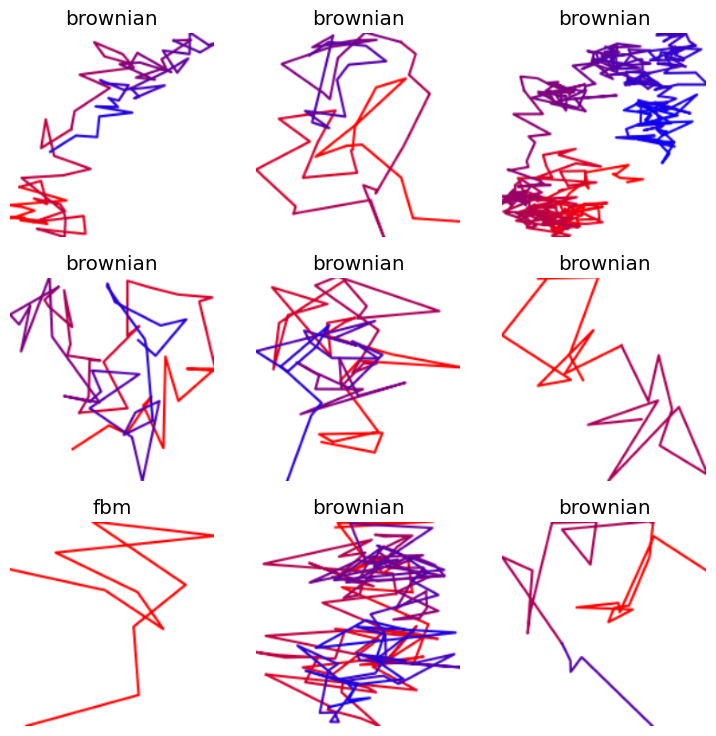

In [ ]:
# Fastai's datablack is used to create a Dataloader, similar to pytorch. 
# Blocks define the input and output types - in this case the inputs are images and outputs are category predictions
# get_y automates the labeling process based on the directory the images are in
# item_tfms transformers the images to be the right shape for the model we will use

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)).dataloaders(path)

dls.show_batch() # show example trajectories

In [ ]:
# As our machine learning model, we are using a pretrained convolutional neural network called Resnet. 
# However, Fastai has many different options that you can experiment with, such as: 

# resnet18, resnet34, resnet50, resnet101, resnet152
# squeezenet1_0, squeezenet1_1
# densenet121, densenet169, densenet201, densenet161
# vgg16_bn, vgg19_bn
# alexnet


learn = vision_learner(dls, resnet18, metrics=error_rate) # other metrics you could try are 

learn.lr_find() # You can use this function to see what a good learning rate might be!

In [ ]:
# Instead of training the model from scratch, we use the model we loaded and let it "fine tune" itself on our data
# The first number is the number of epochs the model will fine tune for, and the second is the learning rate

learn.fine_tune(10, 3e-3) # See how your results change depending on how many epocjs you let the model fine tune!

In [ ]:
# we can use a confusion matrix to see which class the model struggles to predict the most

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

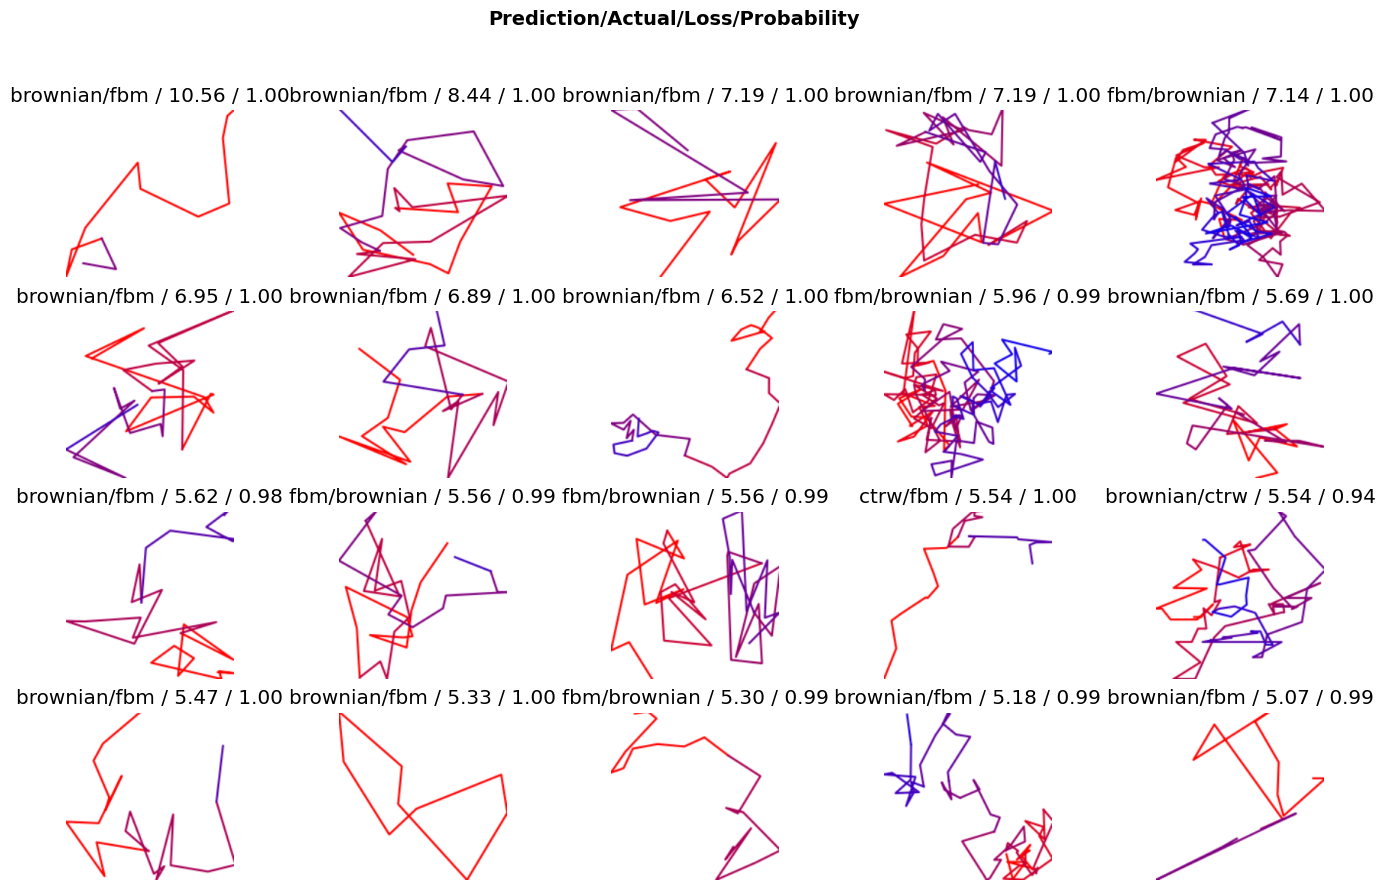

In [ ]:
# This function lets us see which specific images the model struggles the most with. 

interp.plot_top_losses(20, figsize=(17, 10))